# **Problem Statement:-** 
Explore the **Titanic dataset** and analyze the characteristics of the passengers, focusing on both those who **survived** and those who **did not**.

# **Explanation of Titanic Dataset Features**
The Titanic dataset contains information about passengers aboard the RMS Titanic, which sank in 1912. The dataset includes 12 key attributes, which are explained below:
1. **PassengerId** :- A unique identifier assigned to each passenger.
2. **Survived** :- Survival status (0 = Did not survive, 1 = Survived).
3. **Pclass** :- Passenger class (1st = Upper, 2nd = Middle, 3rd = Lower).
4. **Name** :- Full name of the passenger.
5. **Sex** :- Gender of the passenger (Male/Female).
6. **Age** :- Age of the passenger in years.
7. **SibSp** :- Number of siblings/spouses aboard the Titanic with the passenger.
8. **Parch** :- Number of parents/children aboard the Titanic with the passenger.
9. **Ticket** :- Ticket number assigned to the passenger.
10. **Fare** :- Amount paid for the ticket (in British Pounds).
11. **Cabin** :- Cabin number assigned to the passenger (if available).
12. **Embarked** :- Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Dataset Link:- https://www.kaggle.com/code/sandhyakrishnan02/logistic-regression-titanic-dataset/input?select=train.csv

# **Step 1:- Collect Data: Import Libraries**

In [4]:
# Import necessary libraries
import numpy as np        # For numerical computations
import pandas as pd       # For handling dataset
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns     # For statistical data visualization

In [5]:
# Load the Titanic dataset from a CSV file
titanic_data=pd.read_csv('train.csv')

# Display the first 10 rows of the dataset
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Print the total number of passengers in the dataset
print('No. of Passengers in Original Data:'+str(len(titanic_data.index)))

No. of Passengers in Original Data:891


# **Step 2:- Data Analysis**

In [8]:
#info() -  Displaying information about the dataset, such as the number of non-null values, data types of each column, and memory usage.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#describe() - Displaying descriptive statistics of the dataset for numerical columns,including measures such as mean, standard deviation, 
#min, max, and quartiles.
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# duplicated() - Checking for duplicate rows in the dataset
titanic_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [11]:
# duplicated().sum() - Counting the number of duplicate rows in the dataset
titanic_data.duplicated().sum()

0

# **Step 3:- Data Visualization**

# Count Plot

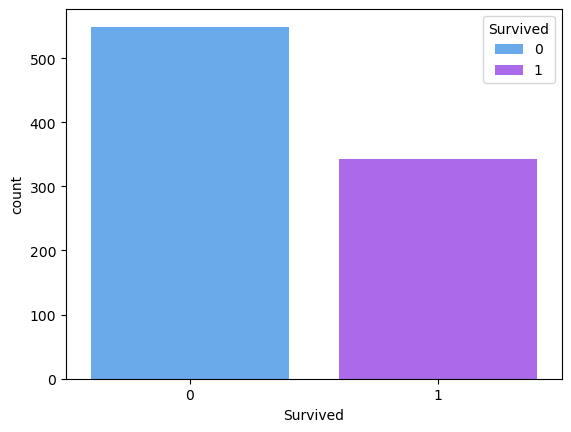

In [14]:
# Create a count plot to visualize the number of passengers who survived (1) and who did not (0)
sns.countplot(x='Survived', data=titanic_data, hue='Survived', palette='cool')

# Display the plot
plt.show()

**Conclusion:-** In this graph shows that around 550 of the passenger who did not survive and they were around 350 passengers who only survived. Based on this, the concusion is that there are very less survivors than non-survivors.

# Count Plot - Survival Count based on Gender

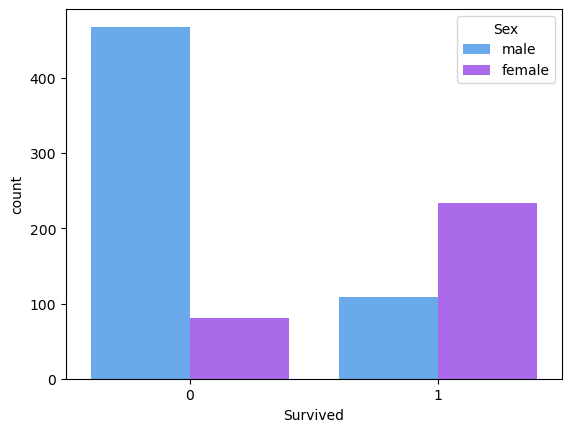

In [17]:
# Create a count plot to compare survival based on gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data, palette='cool')

# Display the plot
plt.show()

**Conclusion:-** The graph clearly shows that more males did not survive, while the majority of females survived.

# Count Plot: Passenger Class vs. Survival in Titanic Dataset

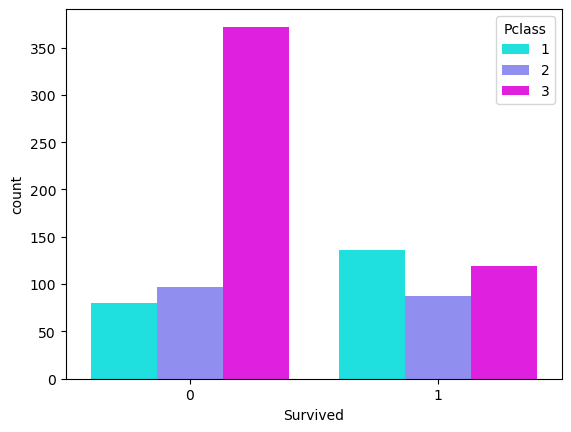

In [20]:
# Create a count plot to visualize survival based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data, palette='cool')

# Display the plot
plt.show()

**Conclusion:-** The analysis shows that passenger class significantly influenced survival. Most fatalities were in 3rd class, while 1st class had the fewest. Among survivors, 1st class had the highest, followed by 3rd and 2nd class. Higher-class passengers had better survival chances, likely due to priority access to lifeboats.

# Histogram: Distribution of Passenger Ages in Titanic Dataset

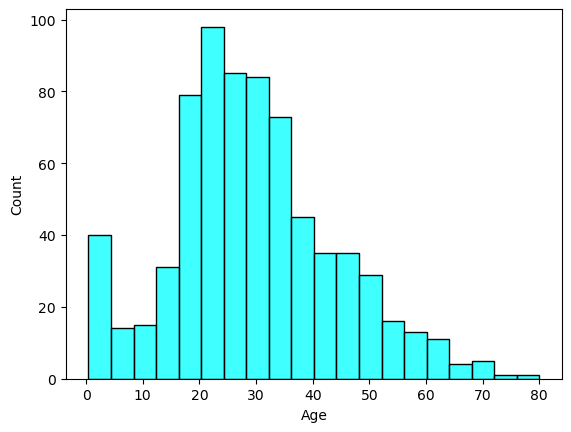

In [23]:
# Create a histogram to visualize the distribution of passenger ages
sns.histplot(titanic_data['Age'],color='cyan')  

# Display the plot
plt.show()

**Conclusion:-** The histogram shows that the majority of passengers were aged between 20-25, indicating that young adults formed a significant portion of the travelers. The least number of passengers were aged between 72-80, suggesting that very few elderly individuals were on board.

# Histogram: Distribution of Fare Prices in Titanic Dataset

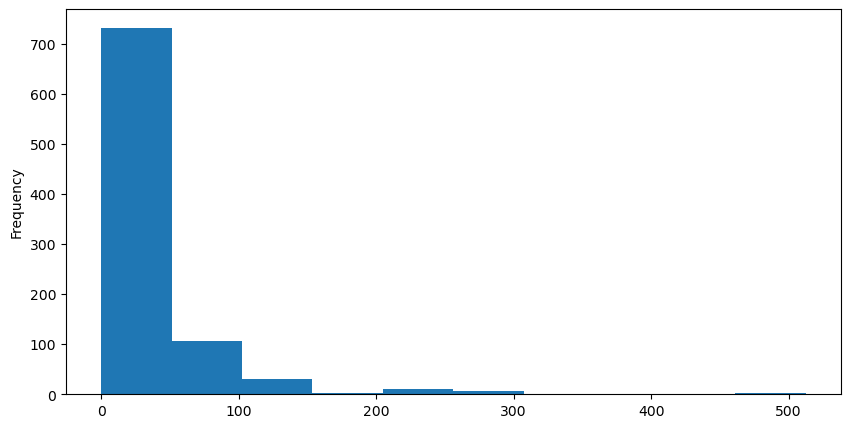

In [26]:
# Create a histogram to visualize the distribution of fare prices
titanic_data['Fare'].plot.hist(figsize=(10,5))  

# Display the plot
plt.show()

**Conclusion:-** The histogram shows that most passengers paid fares in the range of 0-100, indicating that the majority traveled in lower or middle-class cabins. Some passengers paid higher fares, likely corresponding to first-class travelers.

# Count Plot: Number of Siblings/Spouses (SibSp) on Board in Titanic Dataset

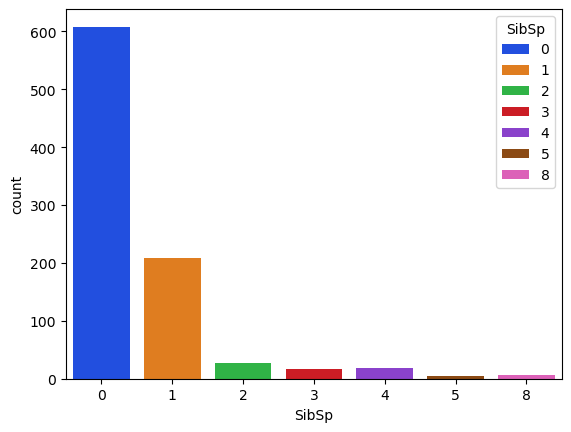

In [29]:
# Create a count plot to visualize the number of siblings/spouses aboard the Titanic
sns.countplot(x='SibSp', data=titanic_data, hue='SibSp', palette='bright')

# Display the plot
plt.show()

**Conclusion:-** Most passengers on the Titanic traveled alone, as indicated by the highest count for SibSp = 0. The second-highest count for SibSp = 1 suggests that many had either one sibling or a spouse on board. Larger family groups, represented by SibSp values of 2, 3, 4, 5, and 8, were relatively rare, highlighting that traveling with multiple family members was uncommon.

# Count Plot: Number of Parents/Children (Parch) on Board in Titanic Dataset

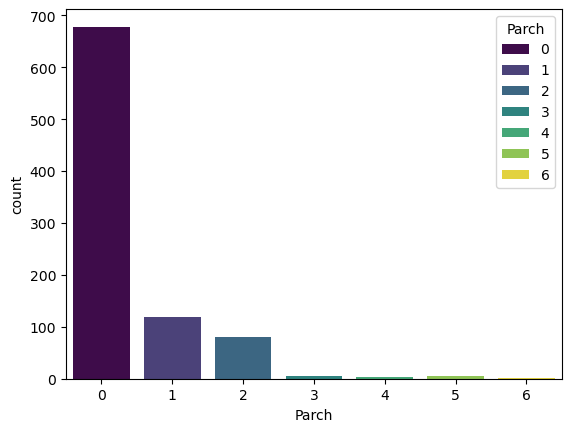

In [32]:
# Create a count plot to visualize the number of parents/children aboard the Titanic
sns.countplot(x='Parch', data=titanic_data, hue='Parch', palette='viridis')

# Display the plot
plt.show()

**Conclusion:-** The count plot shows that the majority of passengers (Parch = 0) traveled alone without parents or children. A smaller group (Parch = 1) had one family member aboard, followed by Parch = 2, indicating a few passengers traveled with two relatives. The presence of larger families (Parch = 3, 4, 5, 6) was significantly lower, suggesting that most passengers on the Titanic were either solo travelers or part of small families.

# Heat Map

In [35]:
# Remove non-numeric columns from the dataset
titanic_heap=titanic_data.drop(columns=['Name','Sex','Cabin','Embarked','Ticket'])

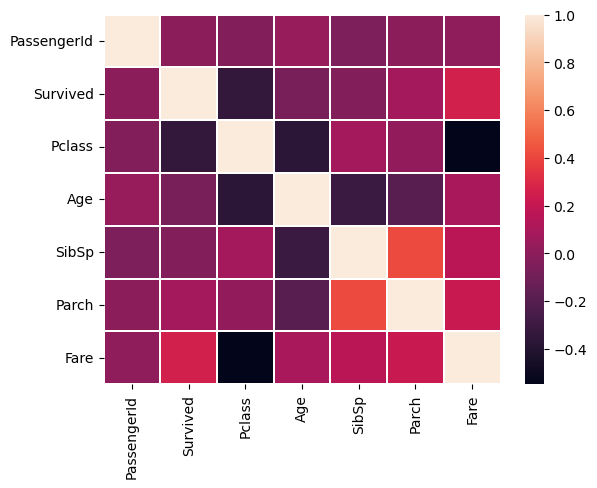

In [36]:
# Generate a heatmap to visualize correlations between numerical features
sns.heatmap(titanic_heap.corr(), cbar=True, lw=0.2)

# Display the plot
plt.show()

The heatmap visually represents relationships between numerical variables in the dataset. Correlation values range between -1 (strong negative correlation), 0 (no correlation), and +1 (strong positive correlation). The diagonal values are 1, indicating that each variable is perfectly correlated with itself. This analysis helps in feature selection by identifying redundant or highly correlated variables, which can be useful for improving model performance.

# Box Plot: Age Distribution Across Passenger Classes

C:\Users\Stephy Mary Mathew\AppData\Local\Temp\ipykernel_17336\1133366174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=titanic_data, palette='bright')


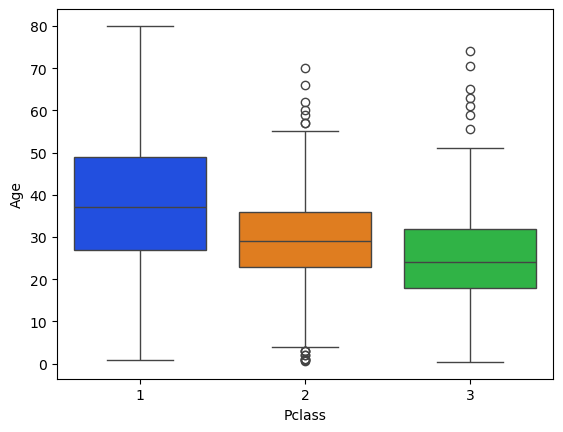

In [39]:
# Create a box plot to compare the age distribution across passenger classes
sns.boxplot(x='Pclass', y='Age', data=titanic_data, palette='bright')

# Display the plot
plt.show()

**Conclusion:-** The box plot shows that passengers traveling in Class 1 and Class 2 tend to be older compared to those in Class 3, where the age distribution is skewed towards younger passengers. This suggests that wealthier, older individuals were more likely to afford higher-class tickets, while younger passengers, possibly immigrants or laborers, traveled in third class.

# **Step 4:- Data Wrangling**

Clean the data by removing the Nan values and unnecessary columns in the dataset

In [42]:
#isnull() -  Checking for missing (null) values in the dataset
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
# isnull().sum() - Checking the total number of missing (null) values for each column in the dataset
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
#  Display the first 5 rows of the dataset
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# Drop the 'Cabin' column from the dataset
titanic_data.drop('Cabin', axis=1, inplace=True)

In [46]:
# Display the first 5 rows of the updated dataset
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
# Remove all rows with missing values
titanic_data.dropna(inplace=True)

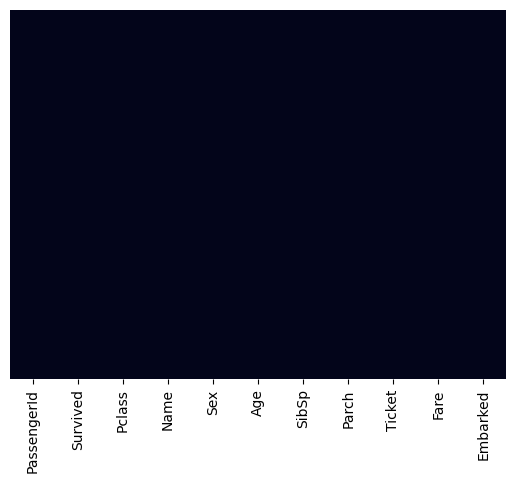

In [48]:
# Create a heatmap to visualize missing values in the dataset
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

# Display the plot
plt.show()

In [49]:
# Count the number of missing values in each column after dropping NaN values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# One-Hot Encoding

In [51]:
# Convert 'Sex' column to dummy variable (0 for Female, 1 for Male)
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True).astype(int)

# Display the first 5 rows of transformed column
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [52]:
# Convert 'Embarked' column into dummy variables (one-hot encoding) and drop the first category
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True).astype(int)

# Display the first 5 rows of the transformed dataset
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


The transformed dataset now represents the 'Embarked' column using binary variables (C, Q), with S implicitly represented. A value of 1 in 'C' indicates the passenger embarked at Cherbourg, while 1 in 'Q' means they embarked at Queenstown. If both C and Q are 0, the passenger embarked at Southampton (S).

In [54]:
# Convert 'Pclass' column into dummy variables (one-hot encoding) and drop the first category
pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True).astype(int)

# Display the first 5 rows of the transformed dataset
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


The transformed dataset now represents the 'Pclass' column using binary variables for Class 2 and Class 3, with Class 1 implicitly represented. A value of 1 in 'Pclass_2' indicates the passenger traveled in Second Class, while 1 in 'Pclass_3' means they traveled in Third Class. If both values are 0, the passenger was in First Class.

In [56]:
# Concatenating the original dataset with the newly created dummy variables
titanic_data = pd.concat([titanic_data, sex, embark, pcl], axis=1)

# Display the first 5 rows of the updated dataset
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [57]:
# Dropping original categorical columns after encoding
titanic_data.drop(columns=['Sex', 'Pclass', 'Name', 'PassengerId', 'Ticket', 'Embarked'], axis=1, inplace=True)

# Display the first 5 rows of the updated dataset
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# **Step 5:- Train & Test Data**

# Identify Feature & Target Data

In [128]:
# Features - 
# Dropping the 'Survived' column to create the feature matrix (X)
x = titanic_data.drop(['Survived'], axis=1).values

# Display the feature matrix
x

array([[22.,  1.,  0., ...,  1.,  0.,  1.],
       [38.,  1.,  0., ...,  0.,  0.,  0.],
       [26.,  0.,  0., ...,  1.,  0.,  1.],
       ...,
       [19.,  0.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  0.,  1.]])

In [129]:
#Target:
# Selecting the 'Survived' column as the target variable (y)
y = titanic_data.iloc[:, 0].values

# Display the target variable
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

# Split the Data into Train & Test Data

In [133]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the dataset into 67% training and 33% testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [135]:
# Displaying the training feature set
x_train

array([[48. ,  1. ,  3. , ...,  1. ,  0. ,  1. ],
       [36. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [57. ,  0. ,  0. , ...,  1. ,  1. ,  0. ],
       ...,
       [43. ,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       [16. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [45.5,  0. ,  0. , ...,  1. ,  0. ,  0. ]])

In [137]:
# Displaying the testing feature set
x_test

array([[37.,  2.,  0., ...,  1.,  0.,  1.],
       [48.,  0.,  0., ...,  1.,  0.,  0.],
       [38.,  0.,  0., ...,  1.,  0.,  1.],
       ...,
       [30.,  1.,  0., ...,  0.,  1.,  0.],
       [41.,  0.,  1., ...,  1.,  1.,  0.],
       [42.,  0.,  0., ...,  1.,  0.,  1.]])

In [139]:
# Displaying the training target set
y_train

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [141]:
# Displaying the testing target set
y_test

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

# **Step 6: ML Classification Models**

# 1. Logistic Regression

In [145]:
# Imports the LogisticRegression model from the sklearn.linear_model library to apply logistic regression for classification tasks.
from sklearn.linear_model import LogisticRegression  

# Creates an instance of the LogisticRegression model called 'lgr'.
lgr = LogisticRegression()  

# Trains the logistic regression model ('lgr') using the training data (x_train for features and y_train for labels).
# This step involves fitting the model to the data by finding the best-fit line that minimizes error in predictions.
lgr.fit(x_train, y_train)  

D:\Users\Stephy Mary Mathew\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Prediction on x_train**

In [147]:
# Make predictions on the training data using the trained logistic regression model
lgr_trainpred=lgr.predict(x_train)

# Display the predicted values for the training set
lgr_trainpred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,

In [148]:
y_train

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

**Prediction on x_test**

In [150]:
# Make predictions on the testing data using the trained logistic regression model
lgr_testpred=lgr.predict(x_test)

# Display the predicted values for the test set
lgr_testpred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

**Accuracy of Logistic Regression**

In [152]:
# Print the accuracy of the model on the training data
print('Train Score: ', lgr.score(x_train, y_train))

# Print the accuracy of the model on the testing data
lgr_acc= lgr.score(x_test, y_test)
print('Test Score: ', lgr_acc)

Train Score:  0.8092369477911646
Test Score:  0.8271028037383178


**Confusion Matrix of Logistic Regression**

In [154]:
# Imports the confusion_matrix function from sklearn.metrics to evaluate the model's performance.
from sklearn.metrics import confusion_matrix

# Generates the confusion matrix by comparing the true labels (y_test) with the predicted labels (lgr_testpred).
# This matrix shows how many predictions the model got correct and incorrect across each class.
cm_lgr = confusion_matrix(y_test,lgr_testpred)

# Displays the confusion matrix which helps evaluate the classification model's performance.
cm_lgr

array([[114,  10],
       [ 27,  63]], dtype=int64)

**Input Values**

In [173]:
# Define a new input sample with passenger features 
# (Age, SibSp, Parch, Fare, male, Q, S, 2, 3)
i = [[24, 1, 0, 7.25, 1, 0, 1, 0, 1]]  # Passenger 1 details
j = [[38, 1, 0, 71.28, 0, 0, 0, 1, 0]] # Passenger 2 details

# Use the trained logistic regression model (lgr) to predict survival based on input features
l = lgr.predict(j)  

# Print the prediction result
if l == 1:  
    print('Person is Survived')  # If the predicted class is 1, the person survived
else:  
    print('Person is Not Survived')  # If the predicted class is 0, the person did not survive

Person is Survived


# 2. SVC (Support Vector Classifier)

In [180]:
# Imports the Support Vector Classifier (SVC) from sklearn.svm to apply support vector machines for classification tasks.
from sklearn.svm import SVC  

# Creates an instance of the SVC model with a 'linear' kernel, which is used to create a linear decision boundary for classification.
svc = SVC(kernel='linear')  

# Fits the SVC model to the training data (x_train for features and y_train for labels), allowing the model to learn from the data.
svc.fit(x_train, y_train)

SVC(kernel='linear')

**Prediction on x_train**

In [185]:
# Make predictions on the training data using the trained svc model
svc_trainpred = svc.predict(x_train)

# Display the predicted values for the training set
svc_trainpred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

**Prediction on x_test**

In [188]:
# Make predictions on the testing data using the trained svc model
svc_testpred = svc.predict(x_test)

# Display the predicted values for the test set
svc_testpred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

**Accuracy of SVC**

In [191]:
# Print the accuracy of the model on the training data
print('Train Score:',svc.score(x_train,y_train))

# Print thr accuracy of the model on the testing data
svc_acc=svc.score(x_test,y_test)
print('Test Score:',svc_acc)

Train Score: 0.7690763052208835
Test Score: 0.8037383177570093


**Confusion Matrix of SVC**

In [194]:
# Computes the confusion matrix using the true labels (y_test) and predicted labels (svc_testpred) from the SVM model.
cm_svc = confusion_matrix(y_test, svc_testpred)

# Displays the confusion matrix, which shows the count of true positive, true negative, false positive, and false negative predictions.
cm_svc

array([[110,  14],
       [ 28,  62]], dtype=int64)

**Input Value**

In [199]:
# Define a new input sample with passenger features 
# (Age, SibSp, Parch, Fare, male, Q, S, 2, 3)
i = [[24, 1, 0, 7.25, 1, 0, 1, 0, 1]]  # Passenger 1 details
j = [[38, 1, 0, 71.28, 0, 0, 0, 1, 0]] # Passenger 2 details

# Use the trained svc model (svc) to predict survival based on input features
s = svc.predict(i)  

# Print the prediction result
if s == 1:  
    print('Person is Survived')  # If the predicted class is 1, the person survived
else:  
    print('Person is Not Survived')  # If the predicted class is 0, the person did not survive

Person is Not Survived


# 3. Decision Tree Classifier

In [202]:
# Imports the DecisionTreeClassifier from sklearn, which is used to build decision tree models for classification tasks.
from sklearn.tree import DecisionTreeClassifier  

# Creates an instance of the DecisionTreeClassifier model called 'dtc'.
dtc = DecisionTreeClassifier()  

# Fits the decision tree model ('dtc') to the training data, using 'x_train' for features and 'y_train' for labels.
# This step builds the decision tree by learning patterns in the data.
dtc.fit(x_train, y_train)  

DecisionTreeClassifier()

**Prediction on x_train**

In [205]:
# Make predictions on the training data using the trained decision tree classifier model
dtc_trainpred=dtc.predict(x_train)

# Display the predicted values for the training set
dtc_trainpred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

**Prediction on x_test**

In [208]:
# Make predictions on the testing data using the trained decision tree classifier model
dtc_testpred=dtc.predict(x_test)
# Display the predicted values for the test set
dtc_testpred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

**Accuracy of Decision Tree Classifier**

In [211]:
# Print the accuracy of the model on the training data
print('Train Score:',dtc.score(x_train,y_train))

# Print the accuracy of the model on the testing data
dtc_acc=dtc.score(x_test,y_test)
print('Test Score:',dtc_acc)

Train Score: 0.9959839357429718
Test Score: 0.7616822429906542


**Confusion Matrix of Decision Tree Classifier**

In [214]:
# Computes the confusion matrix using the true labels (y_test) and predicted labels (svc_testpred) from the Decision Tree Classifier model.
cm_dtc= confusion_matrix(y_test,dtc_testpred)

# Displays the confusion matrix, which shows the count of true positive, true negative, false positive, and false negative predictions.
cm_dtc

array([[96, 28],
       [23, 67]], dtype=int64)

**Input Values**

In [226]:
# Define a new input sample with passenger features 
# (Age, SibSp, Parch, Fare, male, Q, S, 2, 3)
i = [[24, 1, 0, 7.25, 1, 0, 0, 0, 0]]  # Passenger 1 details
j = [[38, 1, 0, 71.28, 0, 0, 0, 1, 0]] # Passenger 2 details

# Use the trained decision tree classifier model (dtc) to predict survival based on input features
d = dtc.predict(j)  

# Print the prediction result
if d == 1:  
    print('Person is Survived')  # If the predicted class is 1, the person survived
else:  
    print('Person is Not Survived')  # If the predicted class is 0, the person did not survive

Person is Survived


# 3. Random Forest Classifier

In [231]:
# Imports the RandomForestClassifier from sklearn.ensemble, which is used to create a random forest model for classification tasks.
from sklearn.ensemble import RandomForestClassifier

# Creates an instance of the RandomForestClassifier called 'rfc'.
rfc=RandomForestClassifier()

# Fits the random forest model ('rfc') to the training data using 'x_train' for features and 'y_train' for labels.
# The model learns patterns from the data by combining multiple decision trees to make predictions.
rfc.fit(x_train,y_train)

RandomForestClassifier()

**Prediction on x_train**

In [234]:
# Make predictions on the training data using the trained random forest classifier model
rf_trainpred = rfc.predict(x_train)

# Display the predicted values for the training set
rf_trainpred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

**Prediction on x_test**

In [237]:
# Make predictions on the testing data using the trained decision tree classifier model
rf_testpred = rfc.predict(x_test)

# Display the predicted values for the test set
rf_testpred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

**Accuracy of Random Forest Classifier**

In [240]:
# Print the accuracy of the model on the training data
print('Train Score: ', rfc.score(x_train, y_train))

# Print the accuracy of the model on the testing data
rf_acc= rfc.score(x_test, y_test)
print('Test Score: ', rf_acc)

Train Score:  0.9959839357429718
Test Score:  0.8271028037383178


**Confusion Matrix of Random Forest Classifier**

In [243]:
# Computes the confusion matrix using the true labels (y_test) and predicted labels (svc_testpred) from the Random Forest Classifier model.
cm_rf = confusion_matrix(y_test, rf_testpred)

# Displays the confusion matrix, which shows the count of true positive, true negative, false positive, and false negative predictions.
cm_rf

array([[109,  15],
       [ 22,  68]], dtype=int64)

**Input Values**

In [252]:
# Define a new input sample with passenger features 
# (Age, SibSp, Parch, Fare, male, Q, S, 2, 3)
i = [[24, 1, 0, 7.25, 1, 0, 1, 0, 1]]  # Passenger 1 details
j = [[38, 1, 0, 71.28, 0, 0, 0, 1, 0]] # Passenger 2 details

# Use the trained random forest classifier model (rfc) to predict survival based on input features
r = rfc.predict(j)  

# Print the prediction result
if r == 1:  
    print('Person is Survived')  # If the predicted class is 1, the person survived
else:  
    print('Person is Not Survived')  # If the predicted class is 0, the person did not survive

Person is Survived


# 5. KNN Classifier

In [255]:
# Imports the KNeighborsClassifier from sklearn.neighbors, which is used to create a K-Nearest Neighbors model for classification tasks.
from sklearn.neighbors import KNeighborsClassifier

# Creates an instance of the KNeighborsClassifier with 5 nearest neighbors (n_neighbors=5).
knn= KNeighborsClassifier(n_neighbors=5)

# Fits the KNN model ('knn') to the training data, using 'x_train' for features and 'y_train' for labels.
# The model will classify data points based on the majority vote of the 5 nearest neighbors in the training data.
knn.fit(x_train,y_train)

KNeighborsClassifier()

**Prediction on x_train**

In [262]:
# Make predictions on the training data using the trained KNN model
knn_trainpred = knn.predict(x_train)

# Display the predicted values for the training set
knn_trainpred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

**Prediction on x_test**

In [264]:
# Make predictions on the testing data using the trained KNN model
knn_testpred = knn.predict(x_test)

# Display the predicted values for the test set
knn_testpred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

**Accuracy of KNN**

In [266]:
# Print the accuracy of the model on the training data
print('Train Score: ', knn.score(x_train, y_train))

# Print the accuracy of the model on the testing data
knn_acc= knn.score(x_test, y_test)
print('Test Score: ', knn_acc)

Train Score:  0.7550200803212851
Test Score:  0.6728971962616822


**Confusion Matrix of KNN**

In [268]:
# Computes the confusion matrix using the true labels (y_test) and predicted labels (svc_testpred) from the KNN model.
cm_knn = confusion_matrix(y_test, knn_testpred)

# Displays the confusion matrix, which shows the count of true positive, true negative, false positive, and false negative predictions.
cm_knn

array([[96, 28],
       [42, 48]], dtype=int64)

**Input Values**

In [274]:
# Define a new input sample with passenger features 
# (Age, SibSp, Parch, Fare, male, Q, S, 2, 3)
i = [[24, 1, 0, 7.25, 1, 0, 0, 0, 0]]  # Passenger 1 details
j = [[38, 1, 0, 71.28, 0, 0, 0, 1, 0]] # Passenger 2 details

# Use the trained knn model (knn) to predict survival based on input features
k = knn.predict(j)  

# Print the prediction result
if k == 1:  
    print('Person is Survived')  # If the predicted class is 1, the person survived
else:  
    print('Person is Not Survived')  # If the predicted class is 0, the person did not survive

Person is Survived


# 6. Naive Bayes

In [277]:
# Imports the GaussianNB (Naive Bayes classifier based on Gaussian distribution) from sklearn.naive_bayes.
from sklearn.naive_bayes import GaussianNB  

# Creates an instance of the GaussianNB classifier called 'nb'.
nb = GaussianNB()  

# Fits the Gaussian Naive Bayes model ('nb') to the training data, using 'x_train' for features and 'y_train' for labels.
# The model will learn the probability distributions of the features and use them to predict the target variable.
nb.fit(x_train, y_train)

GaussianNB()

**Prediction on x_train**

In [280]:
# Make predictions on the training data using the trained naive bayes model
nb_trainpred = nb.predict(x_train)

# Display the predicted values for the training set
nb_trainpred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

**Prediction on x_test**

In [283]:
# Make predictions on the testing data using the trained naive bayes model
nb_testpred = nb.predict(x_test)

# Display the predicted values for the test set
nb_testpred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

**Accuracy of Naive Bayes**

In [286]:
# Print the accuracy of the model on the training data
print('Train Score: ', nb.score(x_train, y_train))

# Print the accuracy of the model on the testing data
nb_acc= nb.score(x_test, y_test)
print('Test Score: ', nb_acc)

Train Score:  0.7771084337349398
Test Score:  0.8084112149532711


**Confusion Matrix of Naive Bayes**

In [289]:
# Computes the confusion matrix using the true labels (y_test) and predicted labels (svc_testpred) from the naive bayes model.
cm_nb = confusion_matrix(y_test, nb_testpred)

# Displays the confusion matrix, which shows the count of true positive, true negative, false positive, and false negative predictions.
cm_nb

array([[112,  12],
       [ 29,  61]], dtype=int64)

**Input Values**

In [294]:
# Define a new input sample with passenger features 
# (Age, SibSp, Parch, Fare, male, Q, S, 2, 3)
i = [[24, 1, 0, 7.25, 1, 0, 0, 0, 0]]  # Passenger 1 details
j = [[38, 1, 0, 71.28, 0, 0, 0, 1, 0]] # Passenger 2 details

# Use the trained naive bayes model (nb) to predict survival based on input features
n = nb.predict(i)  

# Print the prediction result
if n == 1:  
    print('Person is Survived')  # If the predicted class is 1, the person survived
else:  
    print('Person is Not Survived')  # If the predicted class is 0, the person did not survive

Person is Not Survived


# **Step 7: Model Visualization**

In [297]:
# Create a DataFrame with the model names and their respective accuracy scores
df = pd.DataFrame({
    "ML Models": ["Logistic Regression", "SVC", "Decision Tree Classifier","Random Forest Classifier","KNN","Naive Bayes"],  # Model names
    "Accuracy Score": [lgr_acc, svc_acc, dtc_acc,rf_acc,knn_acc,nb_acc]  # Corresponding accuracy scores
})

# Display the DataFrame with model names and their accuracy scores
df

,ML Models,Accuracy Score
0,Logistic Regression,0.827103
1,SVC,0.803738
2,Decision Tree Classifier,0.761682
3,Random Forest Classifier,0.827103
4,KNN,0.672897
5,Naive Bayes,0.808411


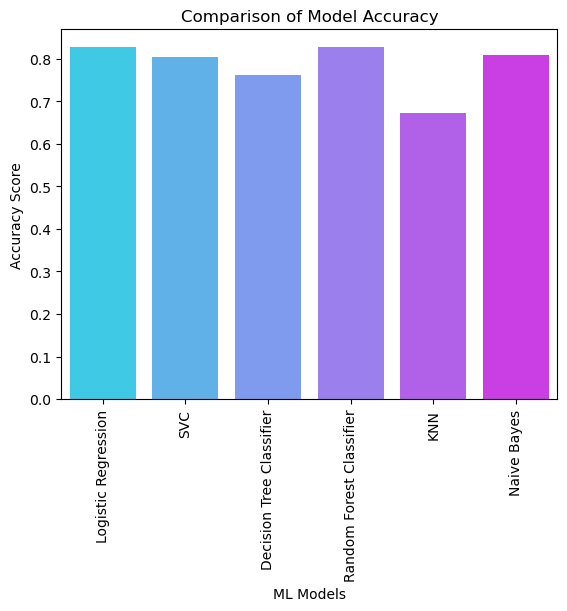

In [299]:
# Create a bar plot to visualize the accuracy scores of different models
sns.barplot(x="ML Models", y="Accuracy Score", data=df,palette='cool',hue='ML Models')

# Set the title of the plot
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=90)

# Show the plot
plt.show()

# **Conclusion on Model Performance for Titanic Dataset:-**

Based on the accuracy scores, ***Logistic Regression*** and ***Random Forest Classifier*** achieved the highest accuracy ***(0.8271)***, indicating their strong performance in predicting survival. ***Naive Bayes (0.8084)*** and ***SVC (0.8037)** also performed well, making them reliable models. However, ***Decision Tree Classifier (0.7617)*** and ***KNN (0.6729)*** showed lower accuracy, suggesting that these models may not generalize well for this dataset. Overall, **Logistic Regression and Random Forest Classifier emerged as the best-performing models**, making them ideal choices for survival prediction on the Titanic dataset.